<a href="https://colab.research.google.com/github/daspartho/codeday-lucknow-ai-workshop/blob/main/Image_classification(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing and installing Libraries

In [ ]:
!pip install tensorflow
!pip install matplotlib
!pip install numpy
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

# Getting the data from the library

In [ ]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
#These are the different classes that our neural network will predict.

In [ ]:
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])




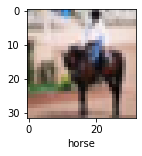

In [ ]:
plot_sample(X_train,y_train,11)

## Image representation
 Each image is represented as as 32 x 32 array where each element is ALSO AN ARRAY that contains 3 numbers within the range 0 - 255 to signify the respective RGB values for that pixel.

In [ ]:
#Sample representation of an Image
print(X_train[11])
# All the values are between 0 - 255 as they all of them represent a pixel in RGB from. \
# Each array has 32 rows and columns, where each pixel is an array.

[[[142 149 152]
  [172 172 167]
  [176 168 154]
  ...
  [216 212 211]
  [198 194 193]
  [205 202 200]]

 [[191 190 192]
  [196 192 190]
  [174 166 159]
  ...
  [229 222 220]
  [222 215 213]
  [217 210 207]]

 [[220 212 212]
  [217 209 208]
  [192 183 182]
  ...
  [224 214 209]
  [225 214 210]
  [218 208 203]]

 ...

 [[197 152 136]
  [196 152 135]
  [201 156 140]
  ...
  [200 165 146]
  [199 165 146]
  [205 164 150]]

 [[196 157 139]
  [191 152 135]
  [193 154 136]
  ...
  [198 164 144]
  [199 165 145]
  [201 161 146]]

 [[186 150 133]
  [182 147 130]
  [174 139 121]
  ...
  [158 124 105]
  [158 125 106]
  [163 125 111]]]


### Downscaling the image values
for easy processing

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
print(X_train[11])
## The values are now all divided by 255

[[[0.55686275 0.58431373 0.59607843]
  [0.6745098  0.6745098  0.65490196]
  [0.69019608 0.65882353 0.60392157]
  ...
  [0.84705882 0.83137255 0.82745098]
  [0.77647059 0.76078431 0.75686275]
  [0.80392157 0.79215686 0.78431373]]

 [[0.74901961 0.74509804 0.75294118]
  [0.76862745 0.75294118 0.74509804]
  [0.68235294 0.65098039 0.62352941]
  ...
  [0.89803922 0.87058824 0.8627451 ]
  [0.87058824 0.84313725 0.83529412]
  [0.85098039 0.82352941 0.81176471]]

 [[0.8627451  0.83137255 0.83137255]
  [0.85098039 0.81960784 0.81568627]
  [0.75294118 0.71764706 0.71372549]
  ...
  [0.87843137 0.83921569 0.81960784]
  [0.88235294 0.83921569 0.82352941]
  [0.85490196 0.81568627 0.79607843]]

 ...

 [[0.77254902 0.59607843 0.53333333]
  [0.76862745 0.59607843 0.52941176]
  [0.78823529 0.61176471 0.54901961]
  ...
  [0.78431373 0.64705882 0.57254902]
  [0.78039216 0.64705882 0.57254902]
  [0.80392157 0.64313725 0.58823529]]

 [[0.76862745 0.61568627 0.54509804]
  [0.74901961 0.59607843 0.52941176]


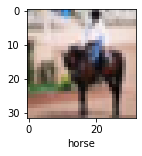

In [ ]:
plot_sample(X_train,y_train,11)

### Building our neural network
- The network is structured in the following manner
- Convolution layer of 32 neurons
- MaxPooling layer(That basically reduces the size of the image, while still retaining the nessesary information)
- Convolution layer of 64 neurons
- Maxpooling layer
- hidden layer
- Output layer of 10 neurons(Each corresponding to the specific classes)

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 54s 34ms/step - loss: 1.4708 - accuracy: 0.4736
Epoch 2/15
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1232 - accuracy: 0.6057
Epoch 3/15
1563/1563 [==============================] - 52s 34ms/step - loss: 1.0026 - accuracy: 0.6508
Epoch 4/15
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9243 - accuracy: 0.6791
Epoch 5/15
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8611 - accuracy: 0.6996
Epoch 6/15
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8033 - accuracy: 0.7207
Epoch 7/15
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7532 - accuracy: 0.7391
Epoch 8/15
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7070 - accuracy: 0.7527
Epoch 9/15
1563/1563 [==============================] - 52s 33ms/step - loss: 0.6705 - accuracy: 0.7626
Epoch 10/15
1563/1563 [==============================] - 53s 34m

In [ ]:
cnn.evaluate(X_test,y_test) # Evaluating our model, checking its error value and accuracy

313/313 [==============================] - 5s 16ms/step - loss: 1.0709 - accuracy: 0.6942


[1.0708554983139038, 0.6941999793052673]

In [ ]:
y_test = y_test.reshape(-1,)


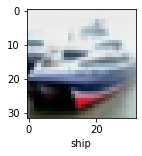

In [ ]:
plot_sample(X_test,y_test,1)

In [ ]:
y_pred = cnn.predict(X_test) # Making our model output predictions
y_pred[:5]

313/313 [==============================] - 5s 15ms/step


array([[8.0652535e-06, 6.1560801e-05, 7.0248409e-03, 7.9418081e-01,
        1.8380597e-05, 3.2074314e-02, 1.5918107e-01, 5.0485841e-08,
        7.4505480e-03, 2.8523019e-07],
       [2.1281911e-04, 1.8095180e-01, 9.5251983e-12, 2.4940935e-12,
        1.2043676e-13, 2.8253179e-18, 7.1892491e-14, 2.9448704e-16,
        8.1883520e-01, 1.8088103e-07],
       [2.9183311e-02, 9.1680558e-04, 4.1186728e-04, 6.4425898e-05,
        1.1401552e-04, 5.7048902e-07, 1.2441994e-06, 2.4946969e-06,
        9.6922672e-01, 7.8546975e-05],
       [7.7983981e-01, 9.4293868e-03, 4.2701261e-03, 1.6816650e-03,
        1.0487751e-01, 1.3227128e-06, 1.5240842e-05, 7.7052653e-05,
        9.9029467e-02, 7.7843276e-04],
       [3.8542424e-08, 8.3113136e-06, 1.7270010e-03, 6.4321485e-04,
        3.0826390e-02, 1.8329856e-05, 9.6677601e-01, 7.5073601e-09,
        1.2922666e-07, 6.3702112e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred] # Decoding the predictions
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
for Item in y_classes[:5]:
    print(classes[Item])

cat
ship
ship
airplane
frog


In [ ]:
# Testing one image ourself just to be sure
def test(ImageNumber):
    Image = X_test[ImageNumber]
    Image = Image.reshape(1,32,32,3)
    predicted_thing = cnn.predict(Image)
    plot_sample(X_test,y_test,ImageNumber)
    prediction = [np.argmax(element) for element in predicted_thing]
    print("The prediction value is: ", prediction)
    print ("The class is ",classes[prediction[0]])

In [ ]:
X_test[50].reshape(1,32,32,3).shape

# Function to make the model predict the image

1/1 [==============================] - 0s 50ms/step
The prediction value is:  [7]
The class is  horse


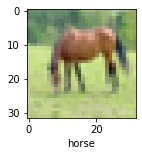

In [ ]:
test(60) # Play around with the numbers, use numbers till 500000
# The 2nd line shows the value the CNN predicted
# The 3rd Line shows the actual image
# 0 is "airplane"
# 1 is "automobile"
# 2 is "bird"
# 3 is "cat"
# 4 is "deer"
# 5 is "dog"
# 6 is "frog"
# 7 is "horse"
# 9 is "ship"
# 10 is "truck"
# These are determined by the neurons in last layer, see the intro to neural network notebook first to get a general introduction.